In [3]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import seaborn as sns
import pickle
import sys
from surface_properties.analysis import Surface

print("Package imported successfully!")


Package imported successfully!


In [6]:
test = mda.Universe('../../../../../../mlx_v2/6.6_2.gro', '../../../../../../mlx_v2/old_trajs/rep1_skip10.xtc')

# Interdigitation, overlap, densities

In [3]:
def run_interdigitation_analysis(universe, lipids, neutral_lipid, solvent, filename='strong_resid_list',
                                 extra_lipids=None, tail_atoms=None, headgroup_atoms=None, leaflet_property="prop z",
                                 use_ls2=False, use_us2=False, nbins=100, b=0, e=None, min_oxygens=3, max_oxygens=6,
                                 strong_atom_prefix="O"):
    
    analysis = Surface.InterdigitationAnalysis(universe, lipids, neutral_lipid, solvent, strong_resid_list_name=filename,
                                       extra_lipids=extra_lipids, tail_atoms=tail_atoms, headgroup_atoms=headgroup_atoms,
                                       leaflet_property=leaflet_property, use_ls2=use_ls2, use_us2=use_us2,
                                       min_oxygens=min_oxygens, max_oxygens=max_oxygens, strong_atom_prefix=strong_atom_prefix)
    
    analysis.setup_groups(extra_lipids=extra_lipids, tail_atoms=tail_atoms, headgroup_atoms=headgroup_atoms,
                          leaflet_property=leaflet_property, use_ls2=use_ls2, use_us2=use_us2)

    return analysis.interdigit(nbins=nbins, b=b, e=e)


In [4]:
results = run_interdigitation_analysis(
    test, ['POPC', 'DOPE', 'SAPI'], 'TRIO', 'TIP3',
    min_oxygens=5,  # Change the number of oxygens required
    max_oxygens=6,  # Adjust max if needed
    filename='strong_residues_min_5', b=0, e=100
)


Using tail atoms: ['C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C210', 'C211', 'C212', 'C213', 'C214', 'C215', 'C216', 'C217', 'C218', 'C219', 'C220', 'C221', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C310', 'C311', 'C312', 'C313', 'C314', 'C315', 'C316', 'C317', 'C318', 'C319', 'C320', 'C321']
Final selected tail atoms in memb: ['C22' 'C32' 'C23' ... 'C316' 'C317' 'C318']
setup_groups() completed!


Processing frames: 100%|███████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.95frame/s]

units: Z (nm), interdigitation (nm), time (ns), density (g/m3)


In [7]:
results2 = run_interdigitation_analysis(
    test, ['POPC', 'DOPE', 'SAPI'], 'TRIO', 'TIP3',
    min_oxygens=1,  # Change the number of oxygens required
    max_oxygens=6,  # Adjust max if needed
    filename='strong_residues_min_1', b=0, e=100
)


Using tail atoms: ['C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C210', 'C211', 'C212', 'C213', 'C214', 'C215', 'C216', 'C217', 'C218', 'C219', 'C220', 'C221', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C310', 'C311', 'C312', 'C313', 'C314', 'C315', 'C316', 'C317', 'C318', 'C319', 'C320', 'C321']
Final selected tail atoms in memb: ['C22' 'C32' 'C23' ... 'C316' 'C317' 'C318']
setup_groups() completed!


Processing frames: 100%|███████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.76frame/s]

units: Z (nm), interdigitation (nm), time (ns), density (g/m3)


In [8]:
results3 = run_interdigitation_analysis(
    test, ['POPC', 'DOPE', 'SAPI'], 'TRIO', 'TIP3',
    min_oxygens=1,  # Change the number of oxygens required
    max_oxygens=6,  # Adjust max if needed
    strong_atom_prefix="C",  # Change from O to C
    filename='strong_residues_C', b=0, e=100
)


Using tail atoms: ['C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C210', 'C211', 'C212', 'C213', 'C214', 'C215', 'C216', 'C217', 'C218', 'C219', 'C220', 'C221', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C310', 'C311', 'C312', 'C313', 'C314', 'C315', 'C316', 'C317', 'C318', 'C319', 'C320', 'C321']
Final selected tail atoms in memb: ['C22' 'C32' 'C23' ... 'C316' 'C317' 'C318']
setup_groups() completed!


Processing frames: 100%|███████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.65frame/s]

units: Z (nm), interdigitation (nm), time (ns), density (g/m3)


In [9]:

def save_and_load_results(results_dict, prefix="results"):

    loaded_results = {}
    for name, results in results_dict.items():
        filename = f"{prefix}_{name}.pkl"
        with open(filename, 'wb') as f:
            pickle.dump(results, f)
        with open(filename, 'rb') as f:
            loaded_results[name] = pickle.load(f)

    return loaded_results


In [10]:
results_dict = {
    "mlx": results,
    "mlx2": results2,
    "mlx3": results3
}

loaded_results = save_and_load_results(results_dict)

results = loaded_results["mlx"]
results2 = loaded_results["mlx2"]
results3 = loaded_results["mlx3"]


In [11]:
def plot_interdigitation_over_time_all(results_list, titles, ncols=3):

    nrows = (len(results_list) + ncols - 1) // ncols  
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 3))
    axes = axes.flatten() 
    lines = []  
    labels = [] 
    
    for i, (results, title) in enumerate(zip(results_list, titles)):
        total_interdigitation = results['inter']['total']
        strong_interdigitation = results['inter']['strong']
        weak_interdigitation = results['inter']['weak']

        # Extract time and interdigitation values
        time_total, inter_total = total_interdigitation[:, 0], total_interdigitation[:, 1]
        time_strong, inter_strong = strong_interdigitation[:, 0], strong_interdigitation[:, 1]
        time_weak, inter_weak = weak_interdigitation[:, 0], weak_interdigitation[:, 1]
        
        if 'drude' in title.lower():
            time_total *= 100
            time_strong *= 100
            time_weak *= 100

        # Plot on respective axes
        line1, = axes[i].plot(time_total, inter_total, label='Total Intedigitation', color='blue')
        line2, = axes[i].plot(time_strong, inter_strong, label='Strong Intedigitation', color='green')
        line3, = axes[i].plot(time_weak, inter_weak, label='Weak Intedigitation', color='red')

        axes[i].set_title(titles[i])
        axes[i].set_xlabel('Time (ns)')
        axes[i].set_ylabel('Interdigitation (nm)')
        axes[i].set_ylim(0, 2.9)
        axes[i].set_xlim(1, None)
        axes[i].grid(True)
        if i == 0:  
            lines.extend([line1, line2, line3])
            labels.extend([line.get_label() for line in [line1, line2, line3]])
    fig.legend(lines, labels, bbox_to_anchor=(0.6, 0.0), fontsize='large')
    for j in range(len(results_list), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
#     plt.savefig('interdigit_relevent.png',dpi=400,bbox_inches='tight')
    plt.show()


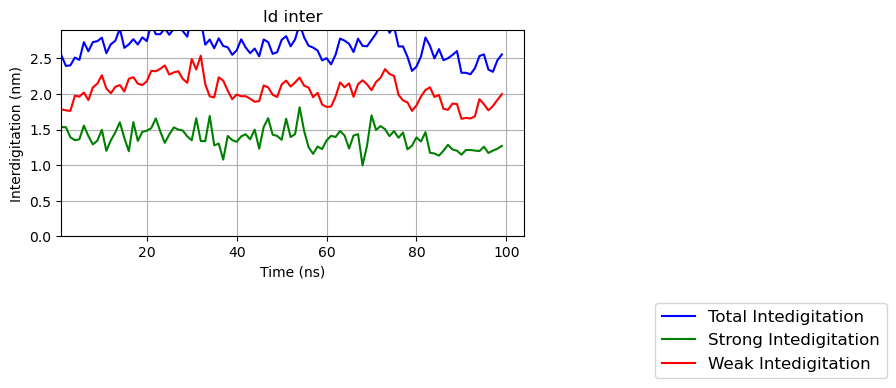

In [12]:
results_list2 = [results2]
titles = ['ld inter']
plot_interdigitation_over_time_all(results_list2, titles)


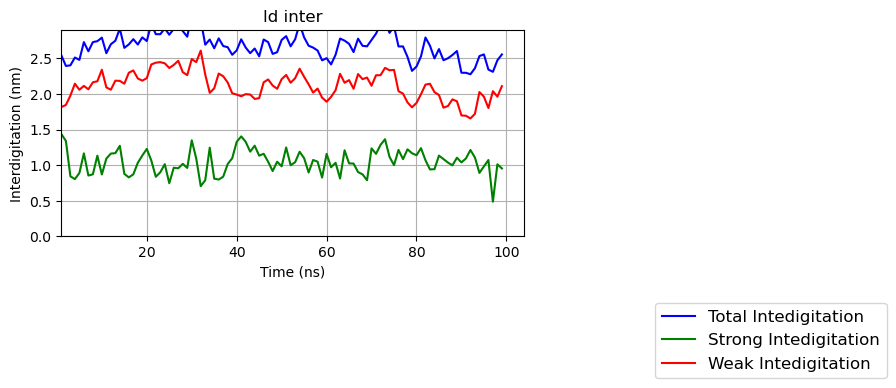

In [13]:
results_list = [results]
titles = ['ld inter']
plot_interdigitation_over_time_all(results_list, titles)


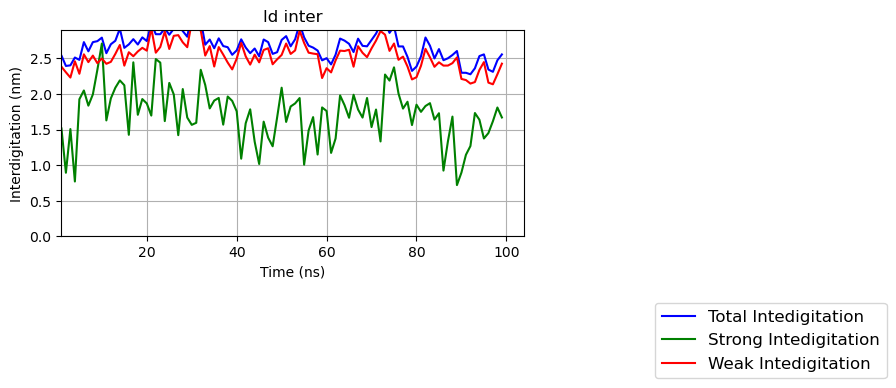

In [14]:
results_list3 = [results3]
titles = ['ld inter']
plot_interdigitation_over_time_all(results_list3, titles)


# Number SURF-TG 

In [16]:
def preprocess_data(results_list, titles):
    processed_results = []
    for results, title in zip(results_list, titles):
        if 'drude' in title.lower():
            results_copy = results.copy()
            results_copy['inter']['strong'][:, 0] *= 100
            processed_results.append(results_copy)
        else:
            processed_results.append(results)
    return processed_results

In [17]:
processed_results_list = preprocess_data(results_list, titles)

In [18]:
results_list

[{'inter': {'total': array([[ 0.        ,  2.54898393],
          [ 1.        ,  2.54246232],
          [ 2.        ,  2.39490968],
          [ 3.        ,  2.40336814],
          [ 4.        ,  2.5132409 ],
          [ 5.        ,  2.48013688],
          [ 6.        ,  2.72972185],
          [ 7.        ,  2.60062491],
          [ 8.        ,  2.72945282],
          [ 9.        ,  2.74317543],
          [10.        ,  2.79241417],
          [11.        ,  2.57398518],
          [12.        ,  2.6997836 ],
          [13.        ,  2.74884585],
          [14.        ,  2.91943564],
          [15.        ,  2.64919756],
          [16.        ,  2.6975631 ],
          [17.        ,  2.77118059],
          [18.        ,  2.69620499],
          [19.        ,  2.7962519 ],
          [20.        ,  2.74477883],
          [21.        ,  2.98944206],
          [22.        ,  2.84115487],
          [23.        ,  2.84070964],
          [24.        ,  2.9220674 ],
          [25.        ,  2.83342

In [19]:
for index, result in enumerate(results_list):
    strong_residues = result.get('strong_residues', [])
    print(f"Entry {index + 1}:")
    for frame_index, residues in enumerate(strong_residues):
        print(f"  Frame {frame_index + 1}: {residues}")


Entry 1:
  Frame 1: [311, 343, 350, 392, 468, 562, 586, 588, 589, 655, 730]
  Frame 2: [311, 343, 360, 392, 468, 562, 586, 588, 589, 655, 730]
  Frame 3: [311, 343, 350, 360, 392, 562, 586, 589, 655, 730]
  Frame 4: [392, 562, 586, 589, 655, 730]
  Frame 5: [360, 392, 468, 589, 655, 730]
  Frame 6: [311, 392, 586, 589, 655, 730]
  Frame 7: [311, 350, 360, 392, 586, 589, 655, 730]
  Frame 8: [311, 360, 392, 589, 655, 730]
  Frame 9: [311, 392, 586, 589, 655, 730]
  Frame 10: [311, 392, 468, 586, 588, 589, 655, 730]
  Frame 11: [350, 392, 468, 586, 655, 730]
  Frame 12: [311, 350, 392, 468, 586, 589, 655, 730]
  Frame 13: [311, 350, 392, 468, 562, 586, 655, 730]
  Frame 14: [311, 350, 392, 468, 562, 586, 655, 730]
  Frame 15: [311, 350, 392, 468, 562, 586, 588, 655]
  Frame 16: [392, 468, 562, 586, 655, 730]
  Frame 17: [392, 468, 562, 586, 588, 655]
  Frame 18: [311, 350, 392, 468, 586, 655]
  Frame 19: [311, 350, 392, 468, 562, 586, 588, 655]
  Frame 20: [311, 350, 392, 468, 562, 586, 